In [ ]:
!pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/NN/NNDataset.zip

Archive:  /content/drive/MyDrive/NN/NNDataset.zip
replace Test/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Test/0.jpg              
  inflating: Test/1.jpg              
  inflating: Test/10.jpg             
  inflating: Test/100.jpg            
  inflating: Test/101.jpg            
  inflating: Test/102.jpg            
  inflating: Test/103.jpg            
  inflating: Test/104.jpg            
  inflating: Test/105.jpg            
  inflating: Test/106.jpg            
  inflating: Test/107.jpg            
  inflating: Test/108.jpg            
  inflating: Test/109.jpg            
  inflating: Test/11.jpg             
  inflating: Test/110.jpg            
  inflating: Test/111.jpg            
  inflating: Test/112.jpg            
  inflating: Test/113.jpg            
  inflating: Test/114.jpg            
  inflating: Test/115.jpg            
  inflating: Test/116.jpg            
  inflating: Test/117.jpg            
  inflating: Test/118.jpg            
  inflating: Tes

In [ ]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from sklearn.preprocessing import *
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
from sklearn.model_selection import*
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
"""
 Our Fixed Parameters
"""
TRAIN_DIR = 'Train';TEST_DIR = 'Test'
IMG_SIZE =45;LR = 0.0001
MODEL_NAME = 'Sports-cnn';n_epochs=50

In [ ]:
def create_label(image_name):
    """
        [1] Description: Encoded Each Class Between 0:5
        [2] Arguments: image_name
        [3] Return: numpy array of encoded value
    """
    word_label = image_name.split('_')[0]
    if word_label == 'Tennis':#4
        return 4
    elif word_label == 'Football':#1
        return 1
    elif word_label == 'Yoga':#5
        return 5
    elif word_label == 'Basketball':#0
        return 0
    elif word_label == 'Swimming':#3
        return 3
    elif word_label == 'Rowing':#2
        return 2

In [ ]:
def create_train_data():
    """
        [1] Description: Create Train Data (Value of Image,Label)
        [2] Arguments: None
        [3] Return: training_data (List)
    """
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR, img)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img_data), create_label(img)])
    #shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data


In [ ]:
labels=[]
def create_test_data():
    """
        [1] Description: Create Test Data (Value of Image,Label)
        [2] Arguments: None
        [3] Return: testing_data (List)
    """
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_data = cv2.imread(path)
        img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
        testing_data.append(np.array(img_data))
        labels.append(img)
    np.save('test_data.npy', testing_data)
    return testing_data


In [ ]:
train_data = create_train_data()
test_data = create_test_data()

100%|██████████| 688/688 [00:05<00:00, 134.85it/s]


In [ ]:
train = pd.DataFrame(train_data)
train[0]

0       [[[254, 254, 254], [254, 254, 254], [254, 254,...
1       [[[243, 243, 243], [246, 246, 246], [247, 247,...
2       [[[8, 33, 37], [20, 42, 47], [23, 46, 48], [27...
3       [[[78, 42, 20], [78, 42, 19], [78, 42, 19], [8...
4       [[[9, 3, 4], [7, 1, 2], [9, 1, 1], [22, 12, 12...
                              ...                        
1676    [[[205, 208, 158], [206, 208, 198], [208, 209,...
1677    [[[47, 41, 42], [50, 41, 44], [49, 41, 41], [6...
1678    [[[40, 37, 32], [37, 28, 31], [111, 105, 124],...
1679    [[[4, 4, 4], [5, 6, 6], [11, 6, 7], [18, 11, 1...
1680    [[[9, 8, 18], [9, 8, 18], [10, 9, 19], [11, 10...
Name: 0, Length: 1681, dtype: object

In [ ]:
train[0]=train[0]/255.
train[0]

0       [[[0.996078431372549, 0.996078431372549, 0.996...
1       [[[0.9529411764705882, 0.9529411764705882, 0.9...
2       [[[0.03137254901960784, 0.12941176470588237, 0...
3       [[[0.3058823529411765, 0.16470588235294117, 0....
4       [[[0.03529411764705882, 0.011764705882352941, ...
                              ...                        
1676    [[[0.803921568627451, 0.8156862745098039, 0.61...
1677    [[[0.1843137254901961, 0.1607843137254902, 0.1...
1678    [[[0.1568627450980392, 0.1450980392156863, 0.1...
1679    [[[0.01568627450980392, 0.01568627450980392, 0...
1680    [[[0.03529411764705882, 0.03137254901960784, 0...
Name: 0, Length: 1681, dtype: object

In [ ]:
train_valid_df, test_df = train_test_split(train, test_size = 0.001,shuffle=True,random_state=20)
X_tr = np.array([i for i in train_valid_df[0]]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_tr = [i for i in train_valid_df[1]]
X_ts = np.array([i for i in test_df[0]]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_ts = [i for i in test_df[1]]

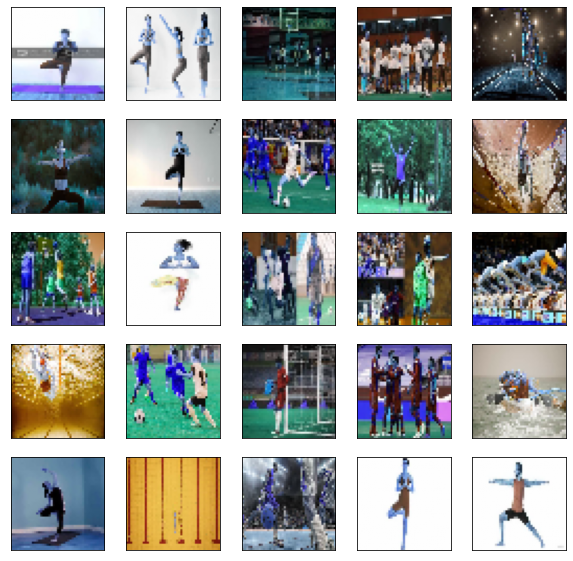

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[0][i])
plt.show()

In [ ]:

def CNN_classification_model():
    # classifier = Sequential()
    # classifier.add(Conv2D(12, (3, 3), input_shape=X_tr.shape[1:], activation='relu', padding='same'))
    # classifier.add(MaxPooling2D(pool_size = (3,3)))
    # classifier.add(Conv2D(8, (2, 2), input_shape=X_tr.shape[1:], activation='relu', padding='same'))
    # classifier.add(Conv2D(12, (3, 3), input_shape=X_tr.shape[1:], activation='relu', padding='same'))
    # classifier.add(Conv2D(6, (2, 2), input_shape=X_tr.shape[1:], activation='relu', padding='same'))
    # classifier.add(MaxPooling2D(pool_size = (3,3)))

    # classifier.add(Flatten())
    # classifier.add(Dense(128))
    # classifier.add(Activation('relu'))
    # classifier.add(Dropout(0.30))
    # classifier.add(Dense(6, activation = 'softmax'))
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same',  input_shape=X_tr.shape[1:]))
    cnn_model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
    cnn_model.add(MaxPooling2D(pool_size = (3,3), strides=(2,2)))


    cnn_model.add(Dropout(0.3))


    cnn_model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
    cnn_model.add(Conv2D(16, (3,3), activation = 'relu', padding = 'same'))
    cnn_model.add(MaxPooling2D(pool_size = (5,5),strides=(3,3)))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Flatten())

    cnn_model.add(Dense(64, activation = 'relu'))

    cnn_model.add(Dropout(0.5))

    cnn_model.add(Dense(6, activation = 'softmax'))
    opt = tf.keras.optimizers.Adamax(learning_rate= 0.001)
    cnn_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])
    return cnn_model


In [ ]:

'''if (os.path.exists('model.tfl.meta')):
    cnn_model.load('./model.tfl')
else:'''
cnn_model =CNN_classification_model()
history = cnn_model.fit(X_tr,y_tr, epochs=300,validation_split=0.25,
                    verbose =1)
cnn_model.save('model.tfl')


Train on 1259 samples, validate on 420 samples
Epoch 1/300
1259/1259 [==============================] - 1s 862us/sample - loss: 1.7255 - acc: 0.2637 - val_loss: 1.7295 - val_acc: 0.3286
Epoch 2/300
1259/1259 [==============================] - 0s 276us/sample - loss: 1.6215 - acc: 0.3741 - val_loss: 1.6018 - val_acc: 0.3952
Epoch 3/300
1259/1259 [==============================] - 0s 238us/sample - loss: 1.4771 - acc: 0.4337 - val_loss: 1.4254 - val_acc: 0.4119
Epoch 4/300
1259/1259 [==============================] - 0s 243us/sample - loss: 1.4039 - acc: 0.4559 - val_loss: 1.3990 - val_acc: 0.4190
Epoch 5/300
1259/1259 [==============================] - 0s 226us/sample - loss: 1.3625 - acc: 0.4615 - val_loss: 1.3871 - val_acc: 0.4262
Epoch 6/300
1259/1259 [==============================] - 0s 233us/sample - loss: 1.3340 - acc: 0.4670 - val_loss: 1.3362 - val_acc: 0.4333
Epoch 7/300
1259/1259 [==============================] - 0s 234us/sample - loss: 1.3279 - acc: 0.4805 - val_loss: 1.320

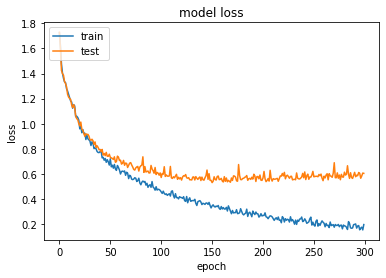

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
FINAL_TEST_X = np.array([i for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
TEST_Y = cnn_model.predict(FINAL_TEST_X)

In [ ]:
TEST_Y

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
FINAL_TEST_Y = []
for i in TEST_Y:
  max = -99999
  for d in range(0,len(i)):
    if i[d] > max:
        max = i[d]
        index = d
  FINAL_TEST_Y.append(index)

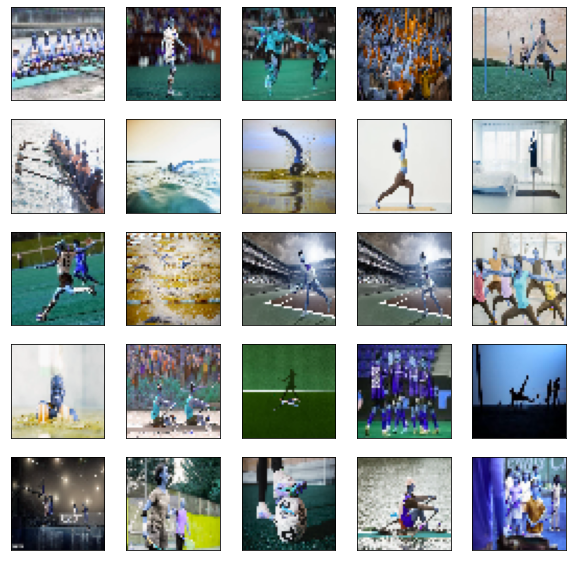

In [ ]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_data[i])
plt.show()

In [ ]:
final = pd.DataFrame()
final["image_name"] =  labels
final["label"] = FINAL_TEST_Y
final.join(pd.DataFrame(TEST_Y))

,image_name,label,0,1,2,3,4,5
0,42.jpg,2,0.0,0.0,1.0,0.0,0.0,0.0
1,395.jpg,1,0.0,1.0,0.0,0.0,0.0,0.0
2,122.jpg,1,0.0,1.0,0.0,0.0,0.0,0.0
3,617.jpg,1,0.0,1.0,0.0,0.0,0.0,0.0
4,684.jpg,1,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
683,509.jpg,5,0.0,0.0,0.0,0.0,0.0,1.0
684,47.jpg,1,0.0,1.0,0.0,0.0,0.0,0.0
685,178.jpg,1,0.0,1.0,0.0,0.0,0.0,0.0
686,682.jpg,1,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
final.to_csv('Final.csv',index=False)

In [ ]:
df=pd.read_csv('Final.csv')
df.head()

,image_name,label
0,42.jpg,2
1,395.jpg,1
2,122.jpg,1
3,617.jpg,1
4,684.jpg,1
